In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data =pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         29947 non-null  object 
 1   continent                        29751 non-null  object 
 2   location                         30011 non-null  object 
 3   date                             30011 non-null  object 
 4   total_cases                      29700 non-null  float64
 5   new_cases                        29700 non-null  float64
 6   total_deaths                     29700 non-null  float64
 7   new_deaths                       29700 non-null  float64
 8   total_cases_per_million          29636 non-null  float64
 9   new_cases_per_million            29636 non-null  float64
 10  total_deaths_per_million         29636 non-null  float64
 11  new_deaths_per_million           29636 non-null  float64
 12  total_tests       

In [4]:
data.isnull().sum()

iso_code                              64
continent                            260
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        20768
new_tests                          21167
total_tests_per_thousand           20768
new_tests_per_thousand             21167
new_tests_smoothed                 19970
new_tests_smoothed_per_thousand    19970
tests_units                        19275
stringency_index                    5752
population                            64
population_density                  1330
median_age                          2959
aged_65_older                       3346
aged_70_older   

In [5]:
data['location'].unique().shape

(212,)

In [6]:
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,2.970000e+04,29700.000000,29700.000000,29700.000000,29636.000000,29636.000000,29636.000000,29636.000000,9.243000e+03,8844.000000,9243.000000,8844.000000,10041.000000,10041.000000,24259.000000,2.994700e+04,28681.000000,27052.000000,26665.000000,26913.000000,26735.000000,17888.000000,27075.000000,27971.000000,21590.000000,21336.000000,12292.000000,24682.000000,29593.000000
mean,4.065739e+04,867.880202,2292.454781,38.298721,937.239169,16.429922,36.604595,0.524779,6.433078e+05,15527.596789,25.719837,0.555073,14437.308834,0.514701,58.328601,9.681313e+07,370.286420,31.743845,9.516743,6.037055,21768.665897,11.249480,248.898113,8.037327,11.047391,32.642101,53.586085,3.160198,74.322853
std,4.093219e+05,7832.377333,22073.872389,337.319892,2360.637068,62.429252,117.736445,2.982476,2.505799e+06,53808.953268,42.975341,0.976099,48687.468603,0.834861,30.642879,6.462318e+08,1693.649902,9.002216,6.395449,4.379332,20792.517268,18.540734,118.193216,4.104017,10.517608,13.320318,31.376145,2.560008,7.291932
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,0.000000,-0.212000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.800000e+01,0.000000,0.000000,0.000000,5.578000,0.000000,0.000000,0.000000,2.249100e+04,824.000000,1.289000,0.053000,914.000000,0.055000,37.960000,1.886202e+06,39.497000,24.900000,3.655000,2.171000,6171.884000,0.500000,152.783000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.280000e+02,4.500000,7.000000,0.000000,111.857000,0.619500,1.392000,0.000000,9.734000e+04,2767.500000,7.152000,0.229000,3041.000000,0.237000,68.520000,8.947027e+06,90.672000,31.900000,7.150000,4.458000,15308.712000,1.700000,235.954000,7.110000,6.900000,31.400000,59.550000,2.540000,75.880000
75%,3.771000e+03,83.000000,83.000000,2.000000,710.095000,9.313000,16.120000,0.116250,3.763960e+05,9121.500000,33.110500,0.688000,9047.000000,0.661000,82.410000,3.236600e+07,222.873000,40.100000,14.864000,9.732000,33132.320000,14.800000,317.840000,10.080000,19.750000,40.900000,83.741000,4.210000,80.180000
max,1.288802e+07,229759.000000,568736.000000,10489.000000,35958.293000,4944.376000,1237.551000,200.040000,4.028218e+07,823375.000000,449.588000,18.630000,666622.000000,13.379000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [8]:
data=data[pd.notnull(data['continent'])]
data.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              311
new_cases_per_million                311
total_deaths_per_million             311
new_deaths_per_million               311
total_tests                        20508
new_tests                          20907
total_tests_per_thousand           20508
new_tests_per_thousand             20907
new_tests_smoothed                 19710
new_tests_smoothed_per_thousand    19710
tests_units                        19015
stringency_index                    5492
population                             0
population_density                  1266
median_age                          2895
aged_65_older                       3282
aged_70_older   

In [9]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million                0
new_cases_per_million                  0
total_deaths_per_million               0
new_deaths_per_million                 0
total_tests                            0
new_tests                              0
total_tests_per_thousand               0
new_tests_per_thousand                 0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand        0
tests_units                        19015
stringency_index                       0
population                             0
population_density                     0
median_age                             0
aged_65_older                          0
aged_70_older   

In [10]:
data.tests_units.unique()


array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested', 'units unclear (incl. non-PCR)'], dtype=object)

In [11]:
data.location.unique().shape

(210,)

## Plot of new cases per million v/s location

In [12]:
data.groupby('location')
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,58.328601,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29746,ZWE,Africa,Zimbabwe,2020-07-09,885.0,98.0,9.0,0.0,59.544,6.594,0.606,0.000,35346.000000,580.000000,2.378000,0.039000,533.000000,0.036000,tests performed,58.328601,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.400000,307.846,1.82,1.600000,30.700000,36.791,1.7,61.49
29747,ZWE,Africa,Zimbabwe,2020-07-10,926.0,41.0,12.0,3.0,62.303,2.759,0.807,0.202,36005.000000,659.000000,2.422000,0.044000,556.000000,0.037000,tests performed,58.328601,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.400000,307.846,1.82,1.600000,30.700000,36.791,1.7,61.49
29748,ZWE,Africa,Zimbabwe,2020-07-11,942.0,16.0,13.0,1.0,63.379,1.077,0.875,0.067,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,58.328601,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.400000,307.846,1.82,1.600000,30.700000,36.791,1.7,61.49
29749,ZWE,Africa,Zimbabwe,2020-07-12,982.0,40.0,18.0,5.0,66.070,2.691,1.211,0.336,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,58.328601,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.400000,307.846,1.82,1.600000,30.700000,36.791,1.7,61.49


In [13]:
data.head()
data=data.drop(labels=['iso_code', 'continent'], axis=1)

In [14]:
data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,58.328601,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
1,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
2,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
3,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83
4,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643307.768149,15527.596789,25.719837,0.555073,14437.308834,0.514701,NaN,0.000000,38928341.0,54.422,18.6,2.581,1.337,1803.987,11.263322,597.029,9.59,11.089656,32.623623,37.746,0.5,64.83


In [15]:
new=[]
death=[]
city=sorted(data.location.unique())
for x in city:
  df=data.loc[data['location']==x]
  new.append(sum(df.new_cases_per_million)/df.shape[0])
  death.append(sum(df.new_deaths_per_million)/df.shape[0])
print(new)
print(death)

[4.758010752688174, 9.450511811023622, 2.2918062827225136, 90.70329508196713, 0.1350438596491228, 1.834623853211009, 6.51430172413793, 17.178116279069766, 57.69276470588235, 8.70317699115044, 1.960178571428571, 10.676653061224489, 12.545534391534398, 2.392144067796612, 99.27709743589746, 9.828208954524861, 3.0374915254237296, 35.73199566603817, 27.605219387755096, 0.8308482142857143, 0.9551176470588235, 20.76508620689655, 0.8923278688524593, 33.42375115982205, 2.591844660194175, 17.059024390243902, 1.631394230769231, 44.75772959183673, 2.4273027522935777, 2.578408, 8.595055555555557, 0.4030243902439022, 0.20214423076923077, 0.04991978609625665, 4.646959349593494, 14.542663265306128, 26.556739130434785, 26.365715517241373, 7.398574999999999, 0.4619051724137931, 125.80389312977097, 0.301704081632653, 23.325128724485563, 4.993671232876713, 3.175933333333333, 11.649500000000002, 3.966918032786886, 4.878048119662264, 1.770099173553718, 1.3602678571428566, 9.400451612903215, 6.27644387755102

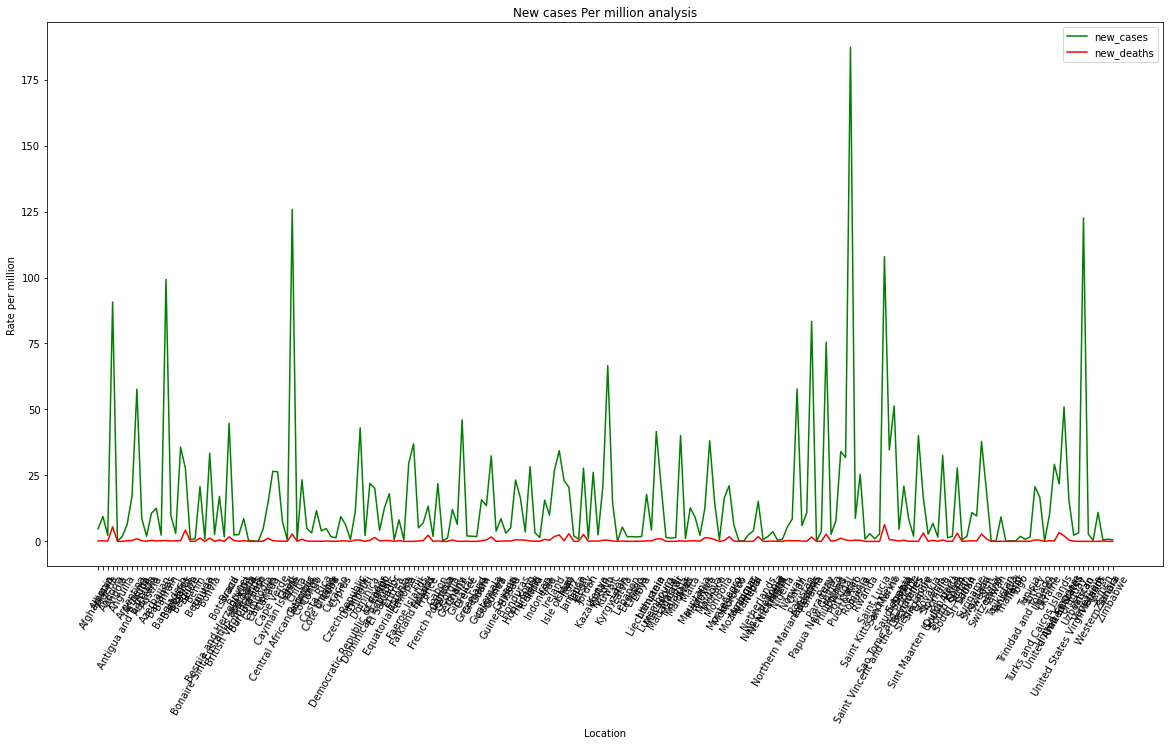

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(city, new, 'g', label='new_cases')
plt.plot(city, death, 'r', label='new_deaths')
plt.title('New cases Per million analysis')
plt.xlabel('Location')
plt.ylabel('Rate per million')
plt.legend()
plt.xticks(city, rotation=60)
plt.show()

In [17]:
df=pd.DataFrame({'Location':city, 'New_cases_per_million':new, 'New_deaths_per_million':death})
df

,Location,New_cases_per_million,New_deaths_per_million
0,Afghanistan,4.758011,0.139489
1,Albania,9.450512,0.254339
2,Algeria,2.291806,0.120707
3,Andorra,90.703295,5.516377
4,Angola,0.135044,0.006895
...,...,...,...
205,Vietnam,0.355870,0.010730
206,Western Sahara,10.998304,0.021190
207,Yemen,0.517063,0.147263
208,Zambia,0.881026,0.019504


### Location with highest avarage new cases per million

In [18]:
print(df[df.New_cases_per_million==df.New_cases_per_million.max()])

    Location  New_cases_per_million  New_deaths_per_million
155    Qatar             187.282771                0.265677


### Location with highest average new deaths per million

In [19]:
print(df[df.New_deaths_per_million==df.New_deaths_per_million.max()])

       Location  New_cases_per_million  New_deaths_per_million
162  San Marino             107.888938                6.346379


### Male v/s Female smokers

In [20]:
female=[]
male=[]
city=sorted(data.location.unique())
for x in city:
  df=data.loc[data['location']==x]
  female.append(sum(df.female_smokers)/df.shape[0])
  male.append(sum(df.male_smokers)/df.shape[0])
print(female)
print(male)

[11.089655978310759, 7.100000000000015, 0.7000000000000014, 29.0, 11.089655978310793, 11.089655978310796, 11.089655978310791, 16.200000000000028, 1.5, 11.089655978310793, 13.0, 28.399999999999952, 0.29999999999999905, 3.100000000000004, 5.799999999999979, 1.0, 1.9000000000000037, 10.5, 25.100000000000005, 11.089655978310793, 0.6000000000000003, 11.089655978310791, 11.089655978310786, 11.089655978310784, 11.089655978310802, 30.199999999999935, 5.699999999999999, 10.099999999999964, 11.089655978310796, 2.0, 30.099999999999937, 1.5999999999999963, 11.0896559783108, 2.0, 11.089655978310786, 12.0, 2.099999999999996, 11.089655978310791, 11.089655978310788, 11.089655978310791, 34.19999999999992, 1.8999999999999955, 4.700000000000001, 4.399999999999999, 1.6999999999999968, 6.399999999999985, 11.089655978310786, 34.30000000000012, 17.099999999999962, 11.089655978310793, 19.599999999999955, 30.5, 11.089655978310786, 19.300000000000065, 1.699999999999997, 11.089655978310793, 8.5, 2.0, 0.200000000

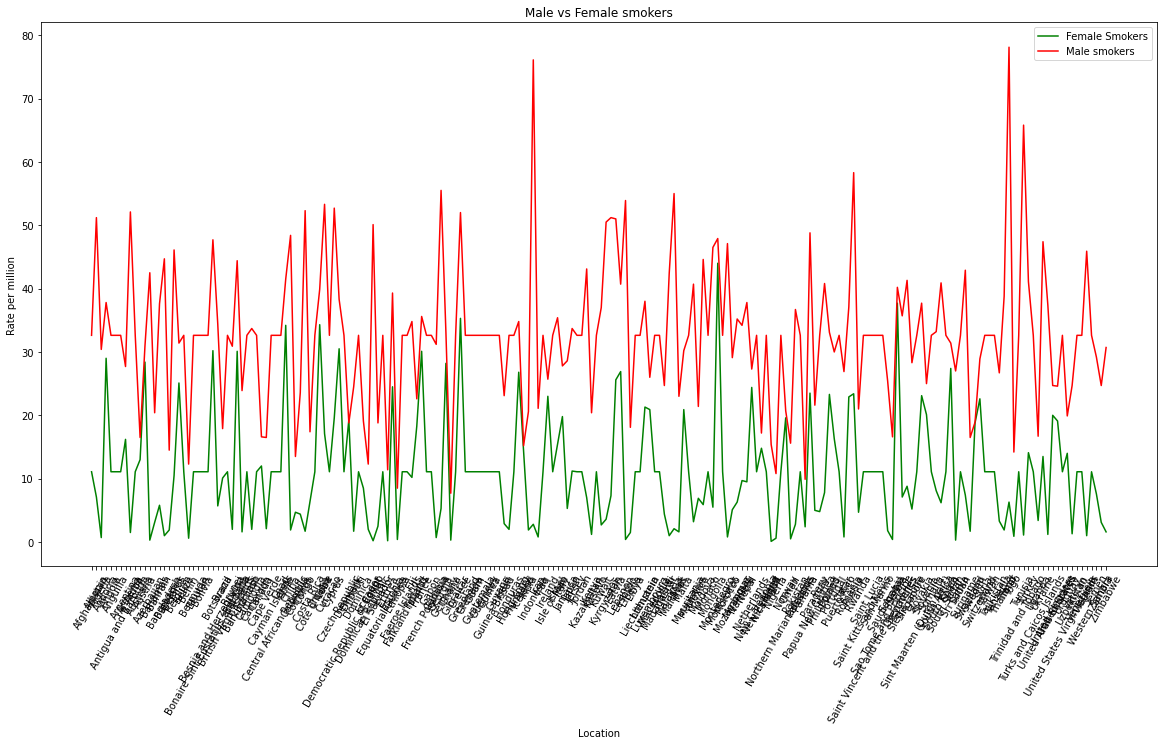

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(city, female, 'g', label='Female Smokers')
plt.plot(city, male, 'r', label='Male smokers')
plt.title('Male vs Female smokers')
plt.xlabel('Location')
plt.ylabel('Rate per million')
plt.legend()
plt.xticks(city, rotation=60)
plt.show()

## Building a regression model for predicting the life expectancy rate using Random Forest Regressor

In [22]:
data=data.drop(labels=['date', 'tests_units'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29751 entries, 0 to 29750
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         29751 non-null  object 
 1   total_cases                      29751 non-null  float64
 2   new_cases                        29751 non-null  float64
 3   total_deaths                     29751 non-null  float64
 4   new_deaths                       29751 non-null  float64
 5   total_cases_per_million          29751 non-null  float64
 6   new_cases_per_million            29751 non-null  float64
 7   total_deaths_per_million         29751 non-null  float64
 8   new_deaths_per_million           29751 non-null  float64
 9   total_tests                      29751 non-null  float64
 10  new_tests                        29751 non-null  float64
 11  total_tests_per_thousand         29751 non-null  float64
 12  new_tests_per_thou

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [24]:
df=data.drop('location', axis=1)

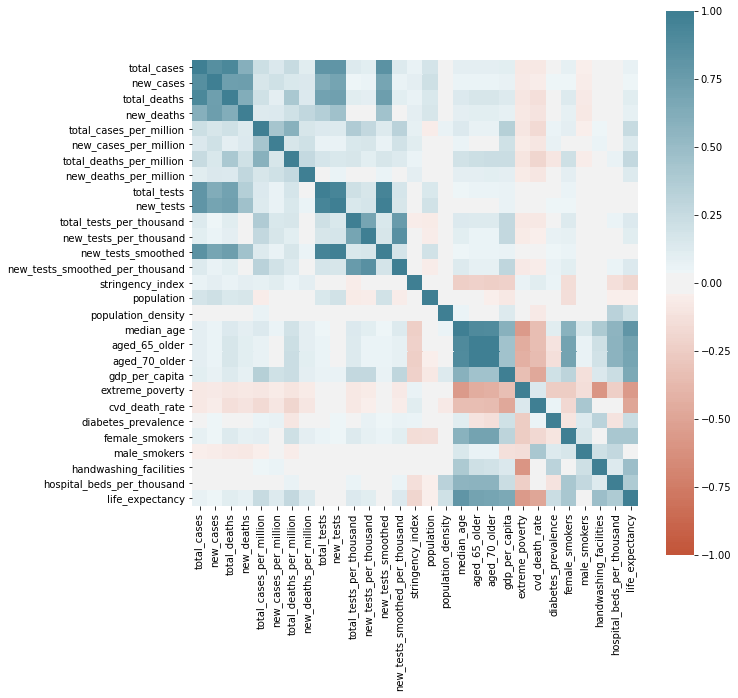

In [25]:
corr = df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [26]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
#df = df[selected_columns]

In [27]:
df_1=df[selected_columns]
df_1.columns

Index(['total_cases', 'new_cases', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [28]:
cor_target = abs(corr["life_expectancy"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

median_age         0.812192
aged_65_older      0.695559
aged_70_older      0.685264
gdp_per_capita     0.650191
extreme_poverty    0.564226
life_expectancy    1.000000
Name: life_expectancy, dtype: float64

In [29]:
cor_target_weak=abs(corr['life_expectancy'])
relavant_features=cor_target[cor_target<0.5]
relavant_features

total_cases                        0.072537
new_cases                          0.044563
total_deaths                       0.114722
new_deaths                         0.082818
total_cases_per_million            0.253134
new_cases_per_million              0.123699
total_deaths_per_million           0.267569
new_deaths_per_million             0.122198
total_tests                        0.013725
new_tests                          0.003773
total_tests_per_thousand           0.140543
new_tests_per_thousand             0.112761
new_tests_smoothed                 0.011871
new_tests_smoothed_per_thousand    0.134220
stringency_index                   0.189193
population                         0.043179
population_density                 0.201570
cvd_death_rate                     0.486287
diabetes_prevalence                0.235727
female_smokers                     0.416322
male_smokers                       0.032946
handwashing_facilities             0.483509
hospital_beds_per_thousand      

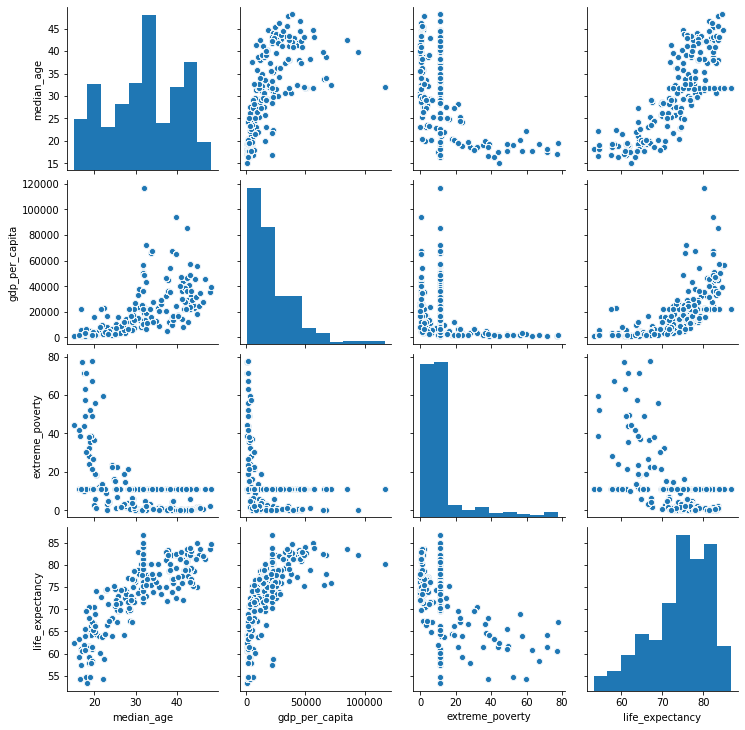

In [30]:
df_1=df[['median_age', 'gdp_per_capita','extreme_poverty','life_expectancy']]
df_1
sns.pairplot(df_1)

In [31]:
y=df['life_expectancy']
X=df.drop('life_expectancy', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(23800, 28)
(5951, 28)


In [32]:
sc_X=StandardScaler()
y_train_rfg=y_train
y_test_rfg=y_test
X_train_rfg=sc_X.fit_transform(X_train)
X_test_rfg=sc_X.transform(X_test)
regressor=RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_rfg, y_train_rfg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
y_pred=regressor.predict(X_test_rfg)

In [34]:
from math import sqrt
mse=sum((y_test_rfg-y_pred)**2)/y_test.shape[0]

In [35]:
print("Accuracy: %0.2d%%"%(100*(1-sqrt(mse))))

Accuracy: 99%


In [36]:
X_train_dt=X_train
X_test_dt=X_test
y_train_dt=y_train
y_test_dt=y_test
X_train_dt=sc_X.fit_transform(X_train_dt)
X_test_dt=sc_X.transform(X_test_dt)
reg=DecisionTreeRegressor(random_state=0)
reg.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [37]:
y_pred_dt=reg.predict(X_test_dt)

In [38]:
print("Accuracy: %0.2d%%"%(100*(1-sqrt((sum((y_test_dt-y_pred_dt)**2))/y_test_dt.shape[0]))))

Accuracy: 99%
